In [145]:
from sklearn.cluster import KMeans
import numpy as np
import csv
import sys
import math
import matplotlib.pyplot
import pandas as pd
from keras.utils import np_utils
import random
import tensorflow as tf
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

In [146]:
maxAcc = 0.0
maxIter = 0
C_Lambda = 0.1
TrainingPercent = 80
ValidationPercent = 10
TestPercent = 10
M = 6
PHI = []

In [147]:
#this function reads the csv file and get the raw data with features.
def Removeheaderandserialno(filePath, IsSynthetic): 
        dataMatrix = [] 
        with open(filePath, 'rU') as fi:
            reader = csv.reader(fi)
            line_count = 0
            for row in reader:
                dataRow = []
                if line_count != 0:
                    for column in row:
                        dataRow.append(column)
                    dataMatrix.append(dataRow)
                line_count += 1
        
        if IsSynthetic == False :
            dataMatrix = np.delete(dataMatrix, [0], axis=1)
        #dataMatrix = np.transpose(dataMatrix)     
        #print (\"Data Matrix Generated..\")
        return dataMatrix

In [148]:
#features are extracted
Human_Feature_Data = Removeheaderandserialno('HumanObserved-Features-Data.csv',False)
GSC_Data = Removeheaderandserialno('GSC-Features.csv',True)
#print(np.matrix(GSC_Data).shape)
#print(np.matrix(GSC_Data))
#print(Human_Feature_Data)
#print(Human_Feature_Data.shape)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
def findByImageId(img_id,isHuman):
    if isHuman == True:
        length = 9
    else:
        length = 512

    elem_present = False
    output = []
    for x in Human_Feature_Data:
        if x[0] == img_id:
            elem_present = True
            op = x
    if elem_present == True:
        for a in op:
            output.append(a)
        output = np.delete(output, [0])
    else:
        for a in range(length):
            output.append(0)
    return output

In [150]:
def insert_into_array(dataRow,op):
    length = len(op)
    for x in op:
        dataRow.append(int(x))
    return dataRow

In [151]:
#this function generates the input matrix based on the catergory concatenation
def generateInputMatrix(filename,same_pair,isHuman):
        dataMatrix = [] 
        if isHuman == True:
            sample_len = 792
        else:
            sample_len = 2000
        with open(filename, 'rU') as fi:
            reader = csv.reader(fi)
            if isHuman == False:
                x = list(reader)
                x.pop(0)
                reader = random.sample(x,sample_len)
            else: 
                if same_pair == False:
                    x = list(reader)
                    x.pop(0)
                    reader = random.sample(x,sample_len)
                
            line_count = 0
            for row in reader:
                dataRow = []
                if line_count != 0:
                    for column in row:
                        if column != '0' and column != '1':
                            op = findByImageId(column,isHuman)
                            dataRow = insert_into_array(dataRow,op)
                        else:
                            dataRow.append(int(column))
                    dataMatrix.append(dataRow)
                line_count += 1

        #dataMatrix = np.transpose(dataMatrix)     
        #print (\"Data Matrix Generated..\")
        return dataMatrix

In [152]:
def subtract_elems(dataRow,op):
    length = len(op)
    for i in range(length):
        dataRow[i] = int(dataRow[i]) - int(op[i])
    return dataRow

In [153]:
def generateSubInputMatrix(filename,same_pair,isHuman):
        dataMatrix = []
        if isHuman == True:
            sample_len = 792
        else:
            sample_len = 2000
        with open(filename, 'rU') as fi:
            reader = csv.reader(fi)
            if isHuman == False:
                x = list(reader)
                x.pop(0)
                reader = random.sample(x,sample_len)
            else: 
                if same_pair == False:
                    x = list(reader)
                    x.pop(0)
                    reader = random.sample(x,sample_len)
                
            line_count = 0
            for row in reader:
                dataRow = []
                if line_count != 0:
                    col_count = 0
                    for column in row:
                        if column != '0' and column != '1':
                            op = findByImageId(column,isHuman)
                            if col_count == 0:
                                dataRow = insert_into_array(dataRow,op)
                            elif col_count == 1:
                                dataRow = subtract_elems(dataRow,op)
                        else:
                            dataRow.append(int(column))
                        col_count += 1
                    dataMatrix.append(dataRow)
                line_count += 1

        #dataMatrix = np.transpose(dataMatrix)     
        #print (\"Data Matrix Generated..\")
        return dataMatrix

In [154]:
#this part of code generates input matrix for human observed feature concatenation
same_concat_pair = generateInputMatrix('HOF_same_pairs.csv',True,True)
diff_concat_pair = generateInputMatrix('HOF_diffn_pairs.csv',False,True)
#print(np.matrix(same_pair).shape)
#print(np.matrix(diff_pair).shape)
human_concat = same_concat_pair + diff_concat_pair
human_concat = np.matrix(human_concat)
np.random.shuffle(human_concat)
print(human_concat)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys


[[2 1 1 ... 3 2 0]
 [0 1 1 ... 0 2 0]
 [0 4 1 ... 2 1 1]
 ...
 [1 0 1 ... 4 1 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 2 2 1]]


In [155]:
#this part of code generates input matrix for human observed feature subtraction
same_sub_pair = generateSubInputMatrix('HOF_same_pairs.csv',True,True)
diff_sub_pair = generateSubInputMatrix('HOF_diffn_pairs.csv',False,True)
#print(np.matrix(same_sub_pair))
human_subtract = same_sub_pair + diff_sub_pair
human_subtract = np.matrix(human_subtract)
np.random.shuffle(human_subtract)
print(human_subtract)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys


[[-1  3  1 ...  0  0  1]
 [ 1  1  0 ...  2  0  1]
 [ 1  0 -1 ...  2 -1  0]
 ...
 [-1 -1  0 ... -1  0  0]
 [-2  1  0 ... -1  0  0]
 [ 0 -3  0 ...  0  0  1]]


In [156]:
#this part of code generates input matrix for GSC feature concatenation
gsc_same_concat_pair = generateInputMatrix('GSC_same_pairs.csv',True,False)
gsc_diff_concat_pair = generateInputMatrix('GSC_diffn_pairs.csv',False,False)
#print(np.matrix(same_pair).shape)
#print(np.matrix(diff_pair).shape)
gsc_concat = gsc_same_concat_pair + gsc_diff_concat_pair
gsc_concat = np.matrix(gsc_concat)
#print(gsc_concat)
np.random.shuffle(gsc_concat)
print(gsc_concat.shape)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys


(3998, 1025)


In [157]:
#this part of code generates input matrix for GSC feature subtraction
gsc_same_sub_pair = generateSubInputMatrix('GSC_same_pairs.csv',True,False)
gsc_diff_sub_pair = generateSubInputMatrix('GSC_diffn_pairs.csv',False,False)
#print(np.matrix(same_sub_pair))
gsc_subtract = gsc_same_sub_pair + gsc_diff_sub_pair
gsc_subtract = np.matrix(gsc_subtract)
np.random.shuffle(gsc_subtract)
print(gsc_subtract.shape)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 'U' mode is deprecated
  import sys


(3998, 513)


In [158]:
#this function reads the file and  gets input labels as input and stores it in a vector.
def GetTargetVector(matrix):
    length = matrix.shape[1]
    index = length-1
    t = matrix[:,index]
    #print("Raw Training Generated..")
    return t

# this function gets the input file and read the data across and rows and cols and Generates a matrix
# Matrix generated in this function is used as raw Data for this problem.
def GetRawData(matrix):    
    length = matrix.shape[1]
    index = length-1
    t = matrix[:,:index]
    dataMatrix = np.transpose(t)     
    #print ("Data Matrix Generated..")
    return dataMatrix

# this function returns 80% of the targetdata as training data output
def GenerateTrainingTarget(rawTraining,TrainingPercent = 80):
    TrainingLen = int(math.ceil(len(rawTraining)*(TrainingPercent*0.01)))
    t           = rawTraining[:TrainingLen]
    #print(str(TrainingPercent) + "% Training Target Generated..")
    return t

# this function returns 80% of the rawdata as training data Matrix
def GenerateTrainingDataMatrix(rawData, TrainingPercent = 80):
    T_len = int(math.ceil(rawData.shape[1]*0.01*TrainingPercent))
    d2 = rawData[:,0:T_len]
    #print(str(TrainingPercent) + "% Training Data Generated..")
    return d2

#this function generates the validation data based on the inputdata and training count
def GenerateValData(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(rawData.shape[1]*ValPercent*0.01))
    V_End = TrainingCount + valSize
    dataMatrix = rawData[:,TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Data Generated..")  
    return dataMatrix

#this function generates the target vector for validation getting target vector,count and percentage as params
def GenerateValTargetVector(rawData, ValPercent, TrainingCount): 
    valSize = int(math.ceil(len(rawData)*ValPercent*0.01))
    V_End = TrainingCount + valSize
    t =rawData[TrainingCount+1:V_End]
    #print (str(ValPercent) + "% Val Target Data Generated..")
    return t

# this function is used to generate the big sigma which is used for computing the phi value
# Big sigma determines how broad the basis function is.
def GenerateBigSigma(Data, MuMatrix,TrainingPercent,IsSynthetic):
    BigSigma    = np.zeros((Data.shape[0],Data.shape[0]))
    #Transposing the data matrix
    DataT       = np.transpose(Data)
    # getting the length of Training data
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))        
    varVect     = []
    #print(len(DataT[0]))
    #the below code loops through the entire data set 41times and
    #computes the variance of each feature set of training data set
    for i in range(0,DataT.shape[1]):
        vct = []
        for j in range(0,int(TrainingLen)):
            vct.append(Data[i,j])    
        varVect.append(np.var(vct))
    
    for j in range(Data.shape[0]):
        BigSigma[j][j] = 0.2 + varVect[j]
    if IsSynthetic == True:
        BigSigma = np.dot(3,BigSigma)
    else:
        BigSigma = np.dot(0.1,BigSigma)
    ##print ("BigSigma Generated..")
    return BigSigma

# this function computes the part of phi matrix calculation
# this does the job of following equation
# (X-U)T * Sigma(Inverse) * (X-U)
def GetScalar(DataRow,MuRow, BigSigInv):  
    R = np.subtract(DataRow,MuRow)
    T = np.dot(BigSigInv,np.transpose(R))  
    L = np.dot(R,T)
    return L

# This is the core formula used in gaussian radial basis function
def GetRadialBasisOut(DataRow,MuRow, BigSigInv):    
    phi_x = math.exp(-0.5*GetScalar(DataRow,MuRow,BigSigInv))
    return phi_x

# this function computes the phi matrix provided with the input features
def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    #computes the inverse of bigsigma
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

# this function computest the weights of closed form.
# The following formula is implemented in the function
# w∗ = (λI + ΦTΦ)−1ΦTt
# which is a least squared regularization
def GetWeightsClosedForm(PHI, T, Lambda):
    Lambda_I = np.identity(len(PHI[0]))
    for i in range(0,len(PHI[0])):
        Lambda_I[i][i] = Lambda
    PHI_T       = np.transpose(PHI)
    PHI_SQR     = np.dot(PHI_T,PHI)
    PHI_SQR_LI  = np.add(Lambda_I,PHI_SQR)
    PHI_SQR_INV = np.linalg.inv(PHI_SQR_LI)
    INTER       = np.dot(PHI_SQR_INV, PHI_T)
    W           = np.dot(INTER, T)
    ##print ("Training Weights Generated..")
    return W

#This is a radial basis computation function.
#This is used for converting the phi(x) into a scalar value
def GetPhiMatrix(Data, MuMatrix, BigSigma, TrainingPercent = 80):
    DataT = np.transpose(Data)
    TrainingLen = math.ceil(len(DataT)*(TrainingPercent*0.01))         
    PHI = np.zeros((int(TrainingLen),len(MuMatrix))) 
    BigSigInv = np.linalg.inv(BigSigma)
    for  C in range(0,len(MuMatrix)):
        for R in range(0,int(TrainingLen)):
            PHI[R][C] = GetRadialBasisOut(DataT[R], MuMatrix[C], BigSigInv)
    #print ("PHI Generated..")
    return PHI

def sigmoid(z):
    return 1./(1 + np.exp(-z))

# this function is used for getting the output vector
# this does the following formula
# y = W * (PHI)T
def GetValTest(VAL_PHI,W,isLogistic):
    if isLogistic == True:
        sigmoid_mat = sigmoid(np.dot(W,np.transpose(VAL_PHI)))
        Y = sigmoid_mat
    else:
        Y = np.dot(W,np.transpose(VAL_PHI))
    ##print ("Test Out Generated..")
    return Y

#This function is used to find the accuracy of the depicted output with the actual output
#It is nothing but taking ROOT MEAN SQUARE of the outputs.
def GetErms(VAL_TEST_OUT,ValDataAct):
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    for i in range (0,len(VAL_TEST_OUT)):
        sum = sum + math.pow((ValDataAct[i] - VAL_TEST_OUT[i]),2)
        if(int(np.around(VAL_TEST_OUT[i], 0)) == ValDataAct[i]):
            counter+=1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    ##print ("Accuracy Generated..")
    ##print ("Validation E_RMS : " + str(math.sqrt(sum/len(VAL_TEST_OUT))))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))



In [159]:
human_concat_target = GetTargetVector(human_concat)
human_subtract_target = GetTargetVector(human_subtract)
gsc_concat_target = GetTargetVector(gsc_concat)
gsc_subtract_target = GetTargetVector(gsc_subtract)

In [160]:
human_concat_raw = GetRawData(human_concat)
human_subtract_raw =  GetRawData(human_subtract)
gsc_concat_raw =  GetRawData(gsc_concat)
gsc_subtract_raw = GetRawData(gsc_subtract) 

In [161]:
def train_linear_regression(human_concat_target,human_concat_raw,isHuman):
    #This functions generates the target for Training the model, which the output Y
    # Training percent determines the number of records to be put in training target
    h_c_TrainingTarget = np.array(GenerateTrainingTarget(human_concat_target,TrainingPercent))
    # This is similar to the previous one, in which the entire dataset features are stored as a matrix
    # The shape is 41 which means we eliminated the 5 features which are not required for computation
    h_c_TrainingData   = GenerateTrainingDataMatrix(human_concat_raw,TrainingPercent)
    #print(h_c_TrainingTarget.shape)
    #print(h_c_TrainingData.shape)
    no = M
    if isHuman == False:
        no = 20
    kmeans = KMeans(n_clusters=no).fit(h_c_TrainingData)

    # This part generates the validation data
    h_c_ValDataAct = np.array(GenerateValTargetVector(human_concat_target,ValidationPercent, (len(h_c_TrainingTarget))))
    h_c_ValData    = GenerateValData(human_concat_raw,ValidationPercent, (len(h_c_TrainingTarget)))
    #print(h_c_ValDataAct.shape)
    #print(h_c_ValData.shape)

    #this part generates the test data
    h_c_TestDataAct = np.array(GenerateValTargetVector(human_concat_target,TestPercent, (len(h_c_TrainingTarget)+len(h_c_ValDataAct))))
    h_c_TestData = GenerateValData(human_concat_raw,TestPercent, (len(h_c_TrainingTarget)+len(h_c_ValDataAct)))
    #print(h_c_ValDataAct.shape)
    #print(h_c_ValData.shape)
    
    ErmsArr = []
    AccuracyArr = []

    # We use kmeans clustering to group the input values to the number of clusters.
    # Number of clusters is initially set as M.
    # Each input feature is clustered to M  centroids
    # Mu is a matrix which contains M centroids for each input feature
    # So the shape of Mu is M * no. of features
    kmeans = KMeans(n_clusters=no, random_state=0).fit(np.transpose(h_c_TrainingData))
    Mu = kmeans.cluster_centers_
    #Big sigma is used in the phi calculation. which denotes the broadness of the basis function.
    #Big sigma is calculated by finding the variance of each input data feature for all the element in training data set
    #Big sigma is of the shape of feature * feature
    BigSigma     = GenerateBigSigma(human_concat_raw, Mu, TrainingPercent,False)
    #print(BigSigma.shape)
    # Training PHI
    # In this problem, we have 46 input features, We need to use linear regression to compute the rank.
    # Radial basis function is a real valued function which determines the distance of the point from the centroid which
    # is calculated using Kmeans Clustering.
    # We use gaussian radial basis function to determine the phi value.
    # Phi matrix converts the 41 input features to M features
    # phi matrix is of the shape (Training size * M)
    TRAINING_PHI = GetPhiMatrix(human_concat_raw, Mu, BigSigma, TrainingPercent)
    #print(TRAINING_PHI.shape)
    # weight vector computation
    # We have the initial linear regression equation of Y = W(Transpose)*Phi
    # inorder to compute the Weights, we need to compute W = phi(inverse)T * Output(T)
    # Since Phi is a not a Sqaured matrix, We use Moore-penrose pseudo Inverse to compute the value of Phi+
    # We use pseudoinverse because it computes the LEAST SQAURE for a system of linear equations
    # There by after applying Regularization, the equation to compute weight becomes
    # W* = (λI + ΦTΦ)−1ΦTt
    W = GetWeightsClosedForm(TRAINING_PHI,h_c_TrainingTarget,(C_Lambda)) 
    weight =[]
    for i in W:
        weight.append(i[0])
    weight = np.array(weight)

    # we compute the phi matrix for test_data similar to the one we have done for training data
    TEST_PHI     = GetPhiMatrix(h_c_TestData, Mu, BigSigma, 100)
    # we compute the phi matrix for validation_data similar to the one we have done for training data
    VAL_PHI      = GetPhiMatrix(h_c_ValData, Mu, BigSigma, 100)
    W_Now        = np.dot(0.1, weight)
    La           = 2
    learningRate = 0.01
    L_Erms_Val   = []
    L_Erms_TR    = []
    L_Erms_Test  = []
    W_Mat        = []

    for i in range(0,400):
        #This part of code implements the stochastic gradient descent solution for W.
        #In Stochastic gradient descent, initially the weight is set to random value
        #Then on subsequent iterations, it computes the difference between Actual and computed output
        # and determines the weight based on the learning rate.
        #This iterations goes on till we reach the convergence point.
        # The formula used in the below part of code 
        # W(t+1) = W(T) + ^w
        #^w = -n*^E
        #^E = ^Ed + lambda*^Ew
        #^Ed = - (t - w(t)T Phi(x))phi(x)
        #print ('---------Iteration: ' + str(i) + '--------------')
        Delta_E_D     = -np.dot((h_c_TrainingTarget[i] - np.dot(np.transpose(W_Now),TRAINING_PHI[i]))[0],TRAINING_PHI[i])
        La_Delta_E_W  = np.dot(La,W_Now)
        Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
        Delta_W       = -np.dot(learningRate,Delta_E)
        W_T_Next      = W_Now + Delta_W
        W_Now         = W_T_Next
    
        #-----------------TrainingData Accuracy---------------------#
        TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next,False) 
        Erms_TR       = GetErms(TR_TEST_OUT,h_c_TrainingTarget)
        L_Erms_TR.append(float(Erms_TR.split(',')[1]))
    
        #-----------------ValidationData Accuracy---------------------#
        VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next,False) 
        Erms_Val      = GetErms(VAL_TEST_OUT,h_c_ValDataAct)
        L_Erms_Val.append(float(Erms_Val.split(',')[1]))
    
        #-----------------TestingData Accuracy---------------------#
        TEST_OUT      = GetValTest(TEST_PHI,W_T_Next,False) 
        Erms_Test = GetErms(TEST_OUT,h_c_TestDataAct)
        L_Erms_Test.append(float(Erms_Test.split(',')[1]))
    
    print ("Training   = " + str(np.around(min(L_Erms_TR),5)))
    print ("Validation = " + str(np.around(min(L_Erms_Val),5)))
    print ("Testing    = " + str(np.around(min(L_Erms_Test),5)))


In [162]:
def getAccuracy(trainingData,targetData):
    length = len(trainingData)
    threshold = 0.5
    count = 0
    for i in range(length):
        if trainingData[i] >= threshold:
            trainingData[i] = 1
        else:
            trainingData[i] = 0
        if trainingData[i] == targetData[i]:
            count += 1
            
    accuracy = (count * 100./length) # *100
    return accuracy

In [163]:
def train_logistic_regression(human_concat_target,human_concat_raw,isHuman):
    h_c_TrainingTarget = np.array(GenerateTrainingTarget(human_concat_target,TrainingPercent))
    h_c_TrainingData   = GenerateTrainingDataMatrix(human_concat_raw,TrainingPercent)
   
    no = M
    if isHuman == False:
        no = 15
    
    kmeans = KMeans(n_clusters=no).fit(h_c_TrainingData)

    # This part generates the validation data
    h_c_ValDataAct = np.array(GenerateValTargetVector(human_concat_target,ValidationPercent, (len(h_c_TrainingTarget))))
    h_c_ValData    = GenerateValData(human_concat_raw,ValidationPercent, (len(h_c_TrainingTarget)))
    #print(h_c_ValDataAct.shape)
    #print(h_c_ValData.shape)

    #this part generates the test data
    h_c_TestDataAct = np.array(GenerateValTargetVector(human_concat_target,TestPercent, (len(h_c_TrainingTarget)+len(h_c_ValDataAct))))
    h_c_TestData = GenerateValData(human_concat_raw,TestPercent, (len(h_c_TrainingTarget)+len(h_c_ValDataAct)))
    #print(h_c_ValDataAct.shape)
    #print(h_c_ValData.shape)
    
    ErmsArr = []
    AccuracyArr = []

    kmeans = KMeans(n_clusters=no, random_state=0).fit(np.transpose(h_c_TrainingData))
    Mu = kmeans.cluster_centers_
    BigSigma     = GenerateBigSigma(human_concat_raw, Mu, TrainingPercent,False)
    TRAINING_PHI = GetPhiMatrix(human_concat_raw, Mu, BigSigma, TrainingPercent)
    W = GetWeightsClosedForm(TRAINING_PHI,h_c_TrainingTarget,(C_Lambda)) 
    weight =[]
    for i in W:
        weight.append(i[0])
    weight = np.array(weight)

    # we compute the phi matrix for test_data similar to the one we have done for training data
    TEST_PHI     = GetPhiMatrix(h_c_TestData, Mu, BigSigma, 100)
    # we compute the phi matrix for validation_data similar to the one we have done for training data
    VAL_PHI      = GetPhiMatrix(h_c_ValData, Mu, BigSigma, 100)
    W_Now        = np.dot(0.1, weight)
    La           = 2
    learningRate = 0.1
    L_Erms_Val   = []
    L_Erms_TR    = []
    L_Erms_Test  = []
    W_Mat        = []

    for i in range(0,400):
        sigmoid_matrix =  sigmoid(np.dot(np.transpose(W_Now),TRAINING_PHI[i]))
        Delta_E_D     = -np.dot((h_c_TrainingTarget[i] - sigmoid_matrix)[0],TRAINING_PHI[i])
        La_Delta_E_W  = np.dot(La,W_Now)
        Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
        Delta_W       = -np.dot(learningRate,Delta_E)
        W_T_Next      = W_Now + Delta_W
        W_Now         = W_T_Next
    
        #-----------------TrainingData Accuracy---------------------#
        TR_TEST_OUT   = GetValTest(TRAINING_PHI,W_T_Next,True)
        #-----------------ValidationData Accuracy---------------------#
        VAL_TEST_OUT  = GetValTest(VAL_PHI,W_T_Next,True) 
        #-----------------TestingData Accuracy---------------------#
        TEST_OUT      = GetValTest(TEST_PHI,W_T_Next,True) 
        Testing_Accuracy = getAccuracy(TEST_OUT,h_c_TestDataAct)
    
    print ("Accuracy   = " + str(Testing_Accuracy))



In [164]:
def encodeLabel(labels):
    processedLabel = []
    for labelInstance in labels:
        if(labelInstance == 1):
            processedLabel.append([1])
        else:
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),2)

def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return 0
    elif encodedLabel == 1:
        return 1

In [184]:
def train_neural_network(human_concat_target,human_concat_raw):
    np.random.shuffle(human_concat_raw)
    NN_TrainingTarget = np.array(GenerateTrainingTarget(human_concat_target,TrainingPercent))
    NN_TrainingTarget = encodeLabel(NN_TrainingTarget)
    NN_TrainingData   = GenerateTrainingDataMatrix(human_concat_raw,TrainingPercent)
    NN_ValDataAct = np.array(GenerateValTargetVector(human_concat_target,ValidationPercent, (len(NN_TrainingTarget))))
    NN_ValDataAct = encodeLabel(NN_ValDataAct)
    NN_ValData    = GenerateValData(human_concat_raw,ValidationPercent, (len(NN_TrainingTarget)))
    NN_TestDataAct = np.array(GenerateValTargetVector(human_concat_target,TestPercent, (len(NN_TrainingTarget)+len(NN_ValDataAct))))
    #NN_ValDataAct = encodeLabel(NN_TestDataAct)
    NN_TestData = GenerateValData(human_concat_raw,TestPercent, (len(NN_TrainingTarget)+len(NN_ValDataAct)))
    # Defining Placeholder
    NN_TrainingData = np.transpose(NN_TrainingData)
    NN_TestData = np.transpose(NN_TestData)
    inputTensor  = tf.placeholder(tf.float32, [None, NN_TrainingData.shape[1]])
    outputTensor = tf.placeholder(tf.float32, [None, 2])
    NUM_HIDDEN_NEURONS_LAYER_1 = 100
    LEARNING_RATE = 0.1

    # Initializing the weights to Normal Distribution
    def init_weights(shape):
        return tf.Variable(tf.random_normal(shape,stddev=0.01))

    # Initializing the input to hidden layer weights
    input_hidden_weights  = init_weights([NN_TrainingData.shape[1], NUM_HIDDEN_NEURONS_LAYER_1])
    # Initializing the hidden to output layer weights
    hidden_output_weights = init_weights([NUM_HIDDEN_NEURONS_LAYER_1, 2])

    # Computing values at the hidden layer
    hidden_layer = tf.nn.relu(tf.matmul(inputTensor, input_hidden_weights))
    # Computing values at the output layer
    output_layer = tf.matmul(hidden_layer, hidden_output_weights)

    # Defining Error Function
    error_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=outputTensor))

    # Defining Learning Algorithm and Training Parameters
    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(error_function)

    # Prediction Function
    prediction = tf.argmax(output_layer, 1)
    NUM_OF_EPOCHS = 250
    BATCH_SIZE = 512

    training_accuracy = []
    training_loss = []
    processedTrainingData = NN_TrainingData
    processedTrainingLabel = NN_TrainingTarget
    processedTestingData = NN_TestData
    with tf.Session() as sess:
    
        # Set Global Variables ?
        # In tensorflow, in order to use a variable it must be initialized before using it. 
        # Global variable initializer inititalizes all the variables that have been used in the program.
        tf.global_variables_initializer().run()
    
        for epoch in tqdm_notebook(range(NUM_OF_EPOCHS)):
        
            #Shuffle the Training Dataset at each epoch
            p = np.random.permutation(range(len(processedTrainingData)))
            processedTrainingData  = processedTrainingData[p]
            processedTrainingLabel = processedTrainingLabel[p]
        
            # Start batch training
            for start in range(0, len(processedTrainingData), BATCH_SIZE):
                end = start + BATCH_SIZE
                sess.run(training, feed_dict={inputTensor: processedTrainingData[start:end], 
                                          outputTensor: processedTrainingLabel[start:end]})
            # Training accuracy for an epoch
            training_accuracy.append(np.mean(np.argmax(processedTrainingLabel, axis=1) ==
                             sess.run(prediction, feed_dict={inputTensor: processedTrainingData,
                                                             outputTensor: processedTrainingLabel})))
            training_loss.append(np.mean(np.argmax(processedTrainingLabel, axis=1) !=
                             sess.run(prediction, feed_dict={inputTensor: processedTrainingData,
                                                             outputTensor: processedTrainingLabel})))
        # Testing
        predictedTestLabel = sess.run(prediction, feed_dict={inputTensor: processedTestingData})

    processedTestingLabel = NN_TestDataAct
    right = 0
    wrong = 0
    for i,j in zip(processedTestingLabel,predictedTestLabel):
        if np.argmax(i) == j:
            right = right + 1
        else:
            wrong = wrong + 1
        
    print("Testing Accuracy: " + str(right/(right+wrong)*100))

In [166]:
print("Linear Regression Results")
print("==============================")
print("==============================")
print("HUMAN OBSERVED FEATURE CONCATENATION")
train_linear_regression(human_concat_target,human_concat_raw,True)
print("HUMAN OBSERVED FEATURE Subtraction")
train_linear_regression(human_subtract_target,human_subtract_raw,True)
print("GSC FEATURE CONCATENATION")
train_linear_regression(gsc_concat_target,gsc_concat_raw,False)
print("GSC FEATURE Subtraction")
train_linear_regression(gsc_subtract_target,gsc_subtract_raw,False)

Linear Regression Results
HUMAN OBSERVED FEATURE CONCATENATION
Training   = 0.70431
Validation = 0.68897
Testing    = 0.74867
HUMAN OBSERVED FEATURE Subtraction
Training   = 0.71369
Validation = 0.70259
Testing    = 0.65325
GSC FEATURE CONCATENATION
Training   = 0.49997
Validation = 0.49999
Testing    = 0.49849
GSC FEATURE Subtraction
Training   = 0.49999
Validation = 0.49996
Testing    = 0.49902


In [167]:
print("Logistic Regression Results")
print("==============================")
print("==============================")
print("HUMAN OBSERVED FEATURE CONCATENATION")
train_logistic_regression(human_concat_target,human_concat_raw,True)
print("HUMAN OBSERVED FEATURE Subtraction")
train_logistic_regression(human_subtract_target,human_subtract_raw,True)
print("GSC FEATURE CONCATENATION")
train_logistic_regression(gsc_concat_target,gsc_concat_raw,False)
print("GSC FEATURE Subtraction")
train_logistic_regression(gsc_subtract_target,gsc_subtract_raw,False)

Logistic Regression Results
HUMAN OBSERVED FEATURE CONCATENATION
Accuracy   = 56.05095541401274
HUMAN OBSERVED FEATURE Subtraction
Accuracy   = 42.67515923566879
GSC FEATURE CONCATENATION
Accuracy   = 53.88471177944862
GSC FEATURE Subtraction
Accuracy   = 53.1328320802005


In [186]:
print("Neural Network Results")
print("==============================")
print("==============================")
print("HUMAN OBSERVED FEATURE CONCATENATION")
train_neural_network(human_concat_target,human_concat_raw)
print("HUMAN OBSERVED FEATURE Subtraction")
train_neural_network(human_subtract_target,human_subtract_raw)
print("GSC FEATURE CONCATENATION")
train_neural_network(gsc_concat_target,gsc_concat_raw)
print("GSC FEATURE Subtraction")
train_neural_network(gsc_subtract_target,gsc_subtract_raw)

Neural Network Results
HUMAN OBSERVED FEATURE CONCATENATION


Testing Accuracy: 51.59235668789809
HUMAN OBSERVED FEATURE Subtraction


Testing Accuracy: 46.496815286624205
GSC FEATURE CONCATENATION


Testing Accuracy: 100.0
GSC FEATURE Subtraction


Testing Accuracy: 100.0


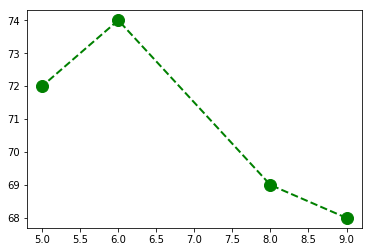

In [170]:
m_value = [9,8,6,5]
erm_m = [68,69,74,72]
plt.plot(m_value,erm_m,'go--', linewidth=2, markersize=12)

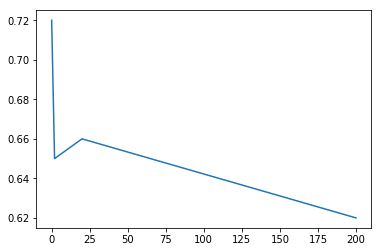

In [171]:
sigma_value = [200,20,2,0.1]
erm_s = [0.62,0.66,0.65,0.72]
plt.plot(sigma_value,erm_s)

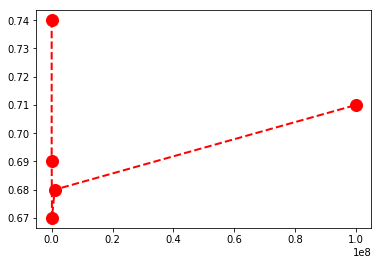

In [172]:
lambda_value = [0.1,100,100000,1000000,100000000]
erm_l = [0.74,0.69,0.67,0.68,0.71]
plt.plot(lambda_value,erm_l,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)

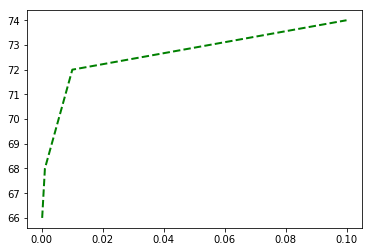

In [173]:
lamb_value = [0.0001,0.001,0.01,0.1]
erm_l = [66,68,72,74]
plt.plot(lamb_value,erm_l,color='green', linestyle='dashed',linewidth=2, markersize=12)

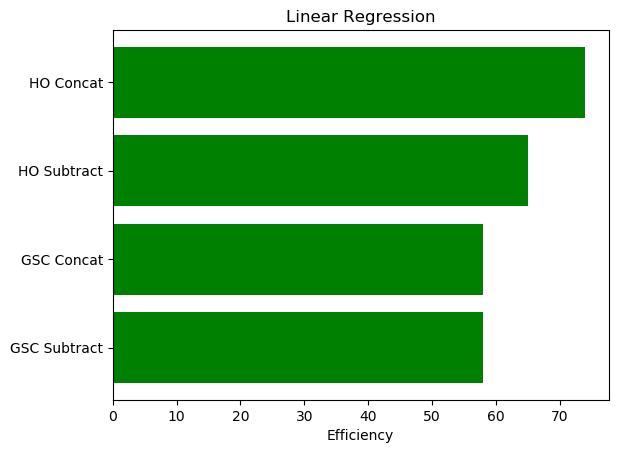

In [180]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('HO Concat', 'HO Subtract', 'GSC Concat', 'GSC Subtract')
y_pos = np.arange(len(people))
performance = (74,65,58,58)

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Efficiency')
ax.set_title('Linear Regression')

plt.show()

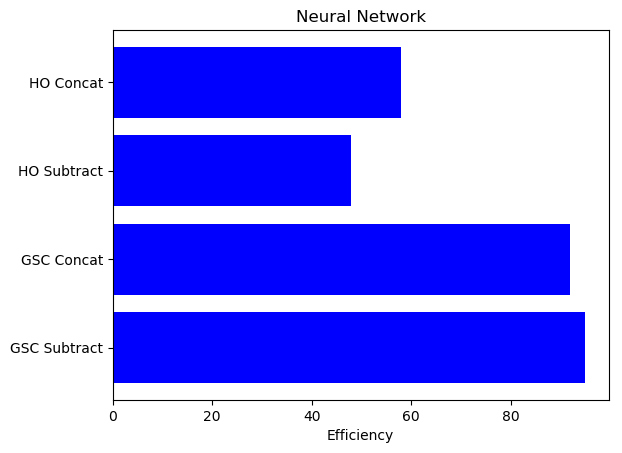

In [178]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('HO Concat', 'HO Subtract', 'GSC Concat', 'GSC Subtract')
y_pos = np.arange(len(people))
performance = (58,48,92,95)

ax.barh(y_pos, performance, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Efficiency')
ax.set_title('Neural Network')

plt.show()